In [1]:
import base64
import hashlib
from Crypto.Cipher import AES
from Crypto import Random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
BLOCK_SIZE = AES.block_size

In [3]:
def pad(s: str) -> str:
    '''
    Padds the str to given block size
    '''
    return s + (BLOCK_SIZE - len(s) % BLOCK_SIZE) * chr(BLOCK_SIZE - len(s) % BLOCK_SIZE)

def unpad(s: str) -> str:
    '''
    Removes the padding from the str
    '''
    return s[:-ord(s[len(s) - 1:])]

def sha256(s: str) -> bytes:
    return hashlib.sha256(s.encode('utf-8')).digest() # digest?

In [4]:
text = 'Hello world'
padded = pad(text)
assert text == unpad(padded)
text, padded

('Hello world', 'Hello world\x05\x05\x05\x05\x05')

In [5]:
def encrypt(plain_text: str, key: str) -> bytes:
    private_key = sha256(key) 
    
    plain_text = pad(plain_text).encode('utf-8')
    
    # XXX: Block size needs to be 16 bytes
    iv = Random.new().read(AES.block_size) # iv - Input vector

    # XXX: Private key can be only 16, 128 or 256 bytes
    cipher = AES.new(private_key, AES.MODE_CBC, iv)
    
    # Base64 encode to avoid problems with printing
    return base64.b64encode(iv + cipher.encrypt(plain_text))

def decrypt(cipher_text: bytes, key: str) -> bytes:
    # 
    private_key = sha256(key)
    cipher_text = base64.b64decode(cipher_text)
    
    # First block contains the seed
    iv = cipher_text[:BLOCK_SIZE]
    cipher = AES.new(private_key, AES.MODE_CBC, iv)
    return unpad(cipher.decrypt(cipher_text[BLOCK_SIZE:]))

In [6]:
msg, pssd = 'Hello world', 'pssd'
encrypted = encrypt(msg, pssd)
decrypted = decrypt(encrypted, pssd)
assert msg == decrypted.decode('utf-8'), 'Decrypted and encrypted text is not the same'
encrypted, decrypted

(b'XyKEH2UZ0GL4p61OlogGep6EQepn2iq1ubZF959F3mc=', b'Hello world')

In [7]:
mbytes = base64.b64decode(encrypted[BLOCK_SIZE:])
mbytes

b'\x96\x88\x06z\x9e\x84A\xeag\xda*\xb5\xb9\xb6E\xf7\x9fE\xdeg'

In [8]:
ar = np.frombuffer(mbytes, dtype=np.uint8)
ar

array([150, 136,   6, 122, 158, 132,  65, 234, 103, 218,  42, 181, 185,
       182,  69, 247, 159,  69, 222, 103], dtype=uint8)

<BarContainer object of 256 artists>

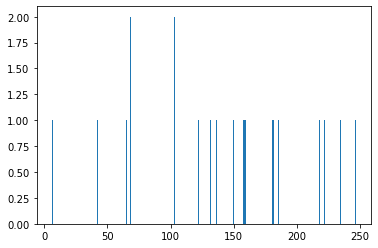

In [9]:
plt.hist(ar, bins=256)[-1]

<BarContainer object of 256 artists>

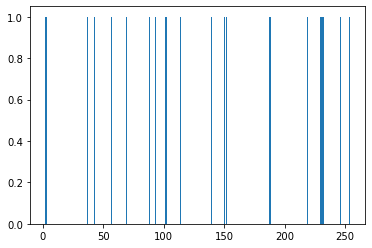

In [10]:
plt.hist(np.random.randint(low=0, high=256, size=len(mbytes)), bins=256)[-1]

In [11]:
from Crypto.Cipher import DES

In [12]:
def encrypt_des(string, key):
    assert len(key) == 8, 'Key needs to be 8 bytes long'
    string = string.encode('utf-8')
    key = key.encode('utf-8')
    cipher = DES.new(key, DES.MODE_OFB)
    encrypted = cipher.iv + cipher.encrypt(string)
    return encrypted

def decrypt_des(string, key):
    iv = string[:8]
    cipher = DES.new(key.encode('utf-8'), DES.MODE_OFB, iv)
    decrypted = cipher.decrypt(string[8:])
    return decrypted

In [13]:
key = '12345678'
text = 'Hello'
e = encrypt_des(text, key)
d = decrypt_des(e, key)
assert text == d.decode('utf-8'), 'Encrypted and decrypted text is not the same'
e[8:], d

(b',Y\x8d\xdb\x10', b'Hello')

In [14]:
r = encrypt_des('a', '12345678')[8:]
r, len(r)

(b'\xa6', 1)

In [15]:
r = encrypt('a', 'a')
r, len(r[BLOCK_SIZE:])

(b'b9vrAWw9K+cUuk/OQkKmADTBMeGqZlIffvYCsgegbCA=', 28)

In [16]:
len('aaaaaaaaaaaaaaa')

15